# Imports

In [4]:
%run imports.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GPU available:  False
OS:  linux


In [5]:
#Set up Test Variables:

#Test batch size
num_batches=100

transform_test = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

testset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True, transform=transform_test)

test_batch_size=int(numpy.shape(testset.data)[0]/num_batches)
#test_batch_size=100

testloader = torch.utils.data.DataLoader(
    testset, batch_size=test_batch_size, shuffle=False, num_workers=2)

test_features, test_labels = next(iter(testloader))
#Get num channels, width and height of input data
c,w,h=list(test_features[0].size())
#Batchsize, see load18.py or main.py for batch size
num_batches=int(numpy.shape(testset.data)[0]/test_batch_size)

from many_inj import progressive_inj_zero

Files already downloaded and verified


In [40]:
model = load.load('bs_1024_sch_cosine/bs_1024_sch_cosine_best_acc')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

res= progressive_inj_zero(pfi_model,10,5,step=100)

# log.save(res,"")

0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
0.7622
1
N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  990.76196
2
N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  1990.76152
3
N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  2990.7603
4
N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  3990.7614799999999999
5
N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500


In [41]:
res

[0.7622,
 0.76196,
 0.76152,
 0.7603,
 0.7614799999999999,
 0.76202,
 0.7609400000000001,
 0.7626000000000001,
 0.76,
 0.75974]

In [44]:


model = load.load('bs_64_sch_cosine_wd_5e-4/bs_64_sch_cosine_wd_5e-4_epoch_300')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())



res= progressive_inj_zero(pfi_model,20,5,step=100)

0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
0.673
1
N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  990.6724
2
N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  1990.6719
3
N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  2990.67288
4
N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  3990.67274
5
N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  

In [49]:
name= "bs_64_sch_cosine" + "_prog_inj_zero" + "_2k_step_100"
log.save(res,name)

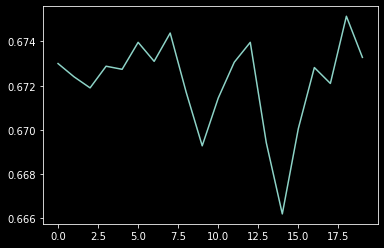

In [47]:
plt.plot(res)

In [50]:
model = load.load('bs_64_sch_cosine_wd_5e-4/bs_64_sch_cosine_wd_5e-4_epoch_300')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())



res= progressive_inj_zero(pfi_model,30,5,step=100)

0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
0.673
1
N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  99N injections:  100
 Injection:  990.6717000000000001
2
N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  199N injections:  200
 Injection:  1990.6734600000000001
3
N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  299N injections:  300
 Injection:  2990.67326
4
N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  399N injections:  400
 Injection:  3990.67242
5
N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N injections:  500
 Injection:  499N inject

In [ ]:
name= "bs_64_sch_cosine" + "_prog_inj_zero" + "_3k_step_100"
log.save(res,name)

In [10]:
model = load.load('bs_1024_sch_cosine/bs_1024_sch_cosine_best_acc')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

res= progressive_inj_zero(pfi_model,30,5,step=100)

name= "bs_1024_sch_cosine" + "_prog_inj_zero" + "_3k_step_100"
log.save(res,name)

TypeError: progressive_inj_zero() got multiple values for argument 'step'

In [9]:
model_name = "bs_1024_sch_cosine"
model_exact_name = model_name + "_best_acc"

model = load.load(model_name + '/' + model_exact_name)

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

avg,std= progressive_inj_zero(pfi_model,10000,1000,5)

res = [avg,std]

name= model_name + "_prog_inj_zero" + "_10k_step_1k"
log.save(res,name)

N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  0
N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  1000
 Injection:  999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  2000
 Injection:  1999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  3000
 Injection:  2999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  4000
 Injection:  3999N injections:  5000
 Injection:  4999N injections:  5000
 Injection:  4999N injections:  5000
 Injection:  4999N injections:  5000
 Injection:  4999N injections:  5000
 Injection: 

In [11]:
res

[[0.7622,
  0.75762,
  0.7577200000000001,
  0.75466,
  0.75684,
  0.74412,
  0.7484999999999999,
  0.75288,
  0.7505400000000001,
  0.73616],
 [0.0,
  0.003547618919782666,
  0.0010906878563548667,
  0.0073904262393991995,
  0.002210520300743678,
  0.010030633080718285,
  0.006793231925968669,
  0.005885031860576462,
  0.006256069053327347,
  0.01114820164869654]]

In [22]:
np.array(res[0]) - np.array(res[1])

array([0.7622    , 0.75407238, 0.75662931, 0.74726957, 0.75462948,
       0.73408937, 0.74170677, 0.74699497, 0.74428393, 0.7250118 ])

In [27]:
mean-standard_dev

array([0.7622    , 0.75407238, 0.75662931, 0.74726957, 0.75462948,
       0.73408937, 0.74170677, 0.74699497, 0.74428393, 0.7250118 ])

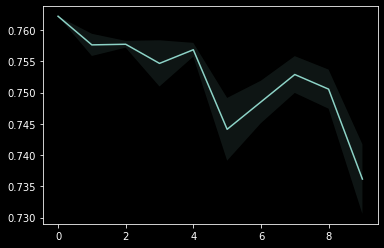

In [46]:
mean= np.array(res[0])
standard_dev= np.array(res[1])/2

y=range(10)

plt.clf()

plt.plot(y,mean)

plt.fill_between(y, mean-standard_dev, mean+standard_dev, alpha = 0.1)

In [26]:
mean

array([0.7622 , 0.75762, 0.75772, 0.75466, 0.75684, 0.74412, 0.7485 ,
       0.75288, 0.75054, 0.73616])

In [ ]:
def testeo():
    return 1,2

res = uno,dos = testeo()

# Weight progressive injections with zero value

In [3]:
model = load.load('bs_1024_sch_plateau/bs_1024_sch_plateau_best_acc')

pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())




In [5]:
res= progressive_inj_zero(pfi_model,10000,1000)

Injection: 0of 10000
Injection: 1000of 10000
 Injection:  999Injection: 2000of 10000
 Injection:  1999Injection: 3000of 10000
 Injection:  2999Injection: 4000of 10000
 Injection:  3999Injection: 5000of 10000
 Injection:  4999Injection: 6000of 10000
 Injection:  5999Injection: 7000of 10000
 Injection:  6999Injection: 8000of 10000
 Injection:  7999Injection: 9000of 10000
 Injection:  8999

In [6]:
res

([0.8524,
  0.8480000000000001,
  0.84512,
  0.8399800000000001,
  0.8375,
  0.8364,
  0.8315000000000001,
  0.8244400000000001,
  0.83104,
  0.81918],
 [0.0,
  0.0020069877926883434,
  0.002305992194262595,
  0.007850961724527762,
  0.005255473337388387,
  0.003428702378451646,
  0.003909475668168299,
  0.012902185861318215,
  0.005342134404898455,
  0.008621925538996506])

In [12]:
avg

[0.8524,
 0.8480000000000001,
 0.84512,
 0.8399800000000001,
 0.8375,
 0.8364,
 0.8315000000000001,
 0.8244400000000001,
 0.83104,
 0.81918]

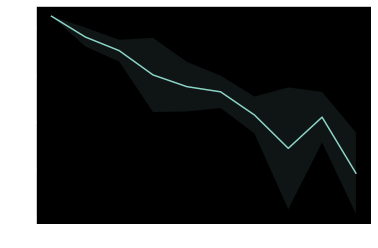

In [26]:
avg = res[0]
std = np.array(res [1])

y=range(len(avg))

plt.clf()

plt.plot(y,avg)

plt.fill_between(y, avg-std, avg+std, alpha = 0.1)

plt.savefig("test2")

In [17]:
utils.save_plt(plt,"test")

<Figure size 432x288 with 0 Axes>

In [25]:
%matplotlib inline
plt.show()
plt.savefig("test3")

<Figure size 432x288 with 0 Axes>

In [21]:
plt.show()

In [ ]:
utils.save_fig_std(avg,std,"test5")

Getting best acc epoch of bs64 cosine

In [37]:
loaded=utils.load("bs_64_sch_cosine_wd_5e-4.json")

In [39]:
len(loaded["test_acc_v"])

300

In [16]:
load["test_acc_v"].index(max(load["test_acc_v"]))

185

Difference between accuracy and loss

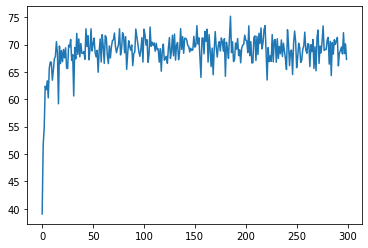

In [18]:
plt.plot(load["test_acc_v"])

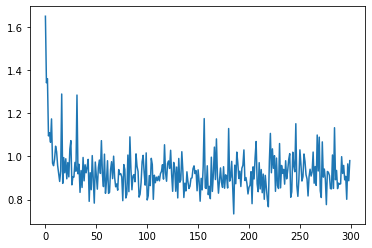

In [19]:
plt.plot(load["test_loss_v"])

In [20]:
load["test_loss_v"].index(min(load["test_loss_v"]))

185

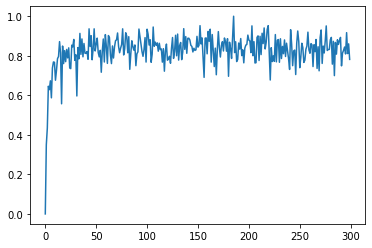

In [65]:
plt.plot(utils.list_norm(loaded["test_acc_v"]))

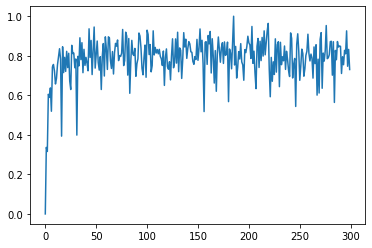

In [67]:
plt.plot(utils.list_norm(-np.array(loaded["test_loss_v"])))

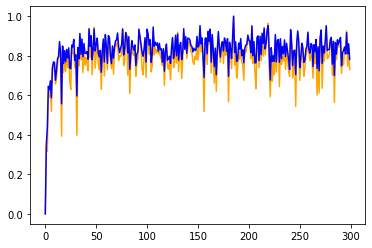

In [72]:
plt.plot(utils.list_norm(-np.array(loaded["test_loss_v"])),color="orange")
plt.plot(utils.list_norm(loaded["test_acc_v"]),color="blue")
plt.show()

Inj for all plateau sch, bs 64, 128, etc..

In [74]:
bs=[2048]
sch="cosine"

path="./checkpoints/"+"bs_"+str(bs[0])+"_sch_"+sch
path_best= path + "/"+"bs_"+str(bs[0])+"_sch_"+sch+"_best_acc"

model = model_actions.load(path_best)

In [76]:
pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

res = many_inj.progressive_inj_zero(pfi_model,10,5)

Injection: 0 of 10
Injection: 5 of 10
Injection: 10 of 10


# Latest progressive Plateau

In [11]:
bss=[256,512,1024]
sch="plateau"

tot=10000
step=1000
n_exp=5

for bs in bss:
    print("Inj for bs: " + str(bs))
    name = "bs_"+str(bs)+"_sch_"+sch
    path="./checkpoints/"+ name
    path_best= path + "/"+"bs_"+str(bs)+"_sch_"+sch+"_best_acc"

    model = model_actions.load(path_best)

    pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

    res = many_inj.progressive_inj_zero(pfi_model,tot,step,n_exp=n_exp)

    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp)
    save_data={}
    save_data["avg"]=res[0]
    save_data["std"]=res[1]
    utils.save(save_data,save_name)

Inj for bs: 256
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
Injection: 6000 of 10000
Injection: 7000 of 10000
Injection: 8000 of 10000
Injection: 9000 of 10000
Injection: 10000 of 10000
Inj for bs: 512
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
Injection: 6000 of 10000
Injection: 7000 of 10000
Injection: 8000 of 10000
Injection: 9000 of 10000
Injection: 10000 of 10000
Inj for bs: 1024
Injection: 0 of 10000
Injection: 1000 of 10000
Injection: 2000 of 10000
Injection: 3000 of 10000
Injection: 4000 of 10000
Injection: 5000 of 10000
Injection: 6000 of 10000
Injection: 7000 of 10000
Injection: 8000 of 10000
Injection: 9000 of 10000
Injection: 10000 of 10000


In [5]:
#Same experiement but for epoch 80, azure
#bss=[64]
bss=[2048]
sch="plateau"

tot=100000
step=10000
n_exp=5

def inj_zero_plateau_epoch_80():

    for bs in bss:
        print("Inj for bs: " + str(bs))
        name = "bs_"+str(bs)+"_sch_"+sch
        path="./checkpoints/"+ name
        path_best= path + "/"+"bs_"+str(bs)+"_sch_"+sch+"_epoch_80"

        model = model_actions.load(path_best)

        pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

        res = many_inj.progressive_inj_zero(pfi_model,tot,step,n_exp=n_exp)

        save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_80"
        save_data={}
        save_data["avg"]=res[0]
        save_data["std"]=res[1]
        save_data["loss_avg"] = [2]
        save_data["loss_std"] = [3]
        utils.save(save_data,save_name)

In [6]:
#Same experiement but for epoch 160, azure
#bss=[64]
bss=[2048]
sch="plateau"

tot=100000
step=10000
n_exp=5

def inj_zero_plateau_epoch_160():

    for bs in bss:
        print("Inj for bs: " + str(bs))
        name = "bs_"+str(bs)+"_sch_"+sch
        path="./checkpoints/"+ name
        path_best= path + "/"+"bs_"+str(bs)+"_sch_"+sch+"_epoch_160"

        model = model_actions.load(path_best)

        pfi_model = pfi_core(model.eval(), h, w, test_batch_size, c=c,debug=True,use_cuda=torch.cuda.is_available())

        res = many_inj.progressive_inj_zero(pfi_model,tot,step,n_exp=n_exp)

        save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
        save_data={}
        save_data["avg"]=res[0]
        save_data["std"]=res[1]
        save_data["loss_avg"] = [2]
        save_data["loss_std"] = [3]
        utils.save(save_data,save_name)

In [7]:
def both_80_and_160():
    inj_zero_plateau_epoch_80()
    inj_zero_plateau_epoch_160()
    

In [8]:
az_manage_proc.run_and_delete(log.log_time,both_80_and_160)

Found existing instance, use it.
Inj for bs: 2048
Injection: 0 of 100000
Injection: 10000 of 100000
Injection: 20000 of 100000
Injection: 30000 of 100000
Injection: 40000 of 100000
Injection: 50000 of 100000


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
az_manage_proc.run_and_delete(log.log_time,inj_zero_plateau_epoch_80)

Found existing instance, use it.
Inj for bs: 64
Injection: 0 of 100000
Injection: 10000 of 100000
Injection: 20000 of 100000
Injection: 30000 of 100000
Injection: 40000 of 100000
Injection: 50000 of 100000
Injection: 60000 of 100000
Injection: 70000 of 100000


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


# Graph results

Inj for bs: 64
Inj for bs: 128
Inj for bs: 256
Inj for bs: 512
Inj for bs: 1024


Text(0, 0.5, 'Accuracy')

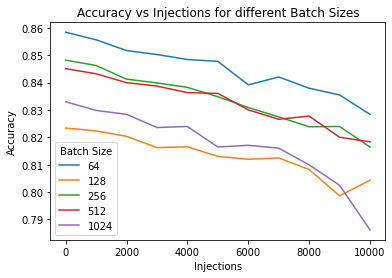

In [6]:
#Graphs for 10k injections
bss=[64,128,256,512,1024]
#bss=[64,128]
sch="plateau"

tot=10000
step=1000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
for bs in bss:
    print("Inj for bs: " + str(bs))
    name = "bs_"+str(bs)+"_sch_"+sch
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp)
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Batch Sizes")
plt.legend(bss,title="Batch Size")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

In [20]:
best_accs

[0.8583999999999999, 0.8234, 0.8482, 0.8451000000000001, 0.833]

In [1]:
#Graphs for 100k injections
bss=[64,128,256,512,1024]
#bss=[64,128]
sch="plateau"

tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
for bs in bss:
    print("Inj for bs: " + str(bs))
    name = "bs_"+str(bs)+"_sch_"+sch
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp)
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Batch Sizes")
plt.legend(bss,title="Batch Size")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

NameError: name 'np' is not defined

Metadata of models

In [16]:
#Get meta data of a checkpoint
bss=[64,128,256,512,1024]
#bss=[64]
sch="plateau"

tot=100000
step=10000
n_exp=5
epoch_of_best=[]
test_acc_of_best=[]
best_acc_of_best=[]
for bs in bss:
    print("Inj for bs: " + str(bs))
    name = "bs_"+str(bs)+"_sch_"+sch
    load_name ="checkpoints/" + name + "/"+name+"_best_acc"
    meta=model_actions.load_meta(load_name)
    epoch_of_best.append(meta["epoch"])
    test_acc_of_best.append(meta["test_acc"])
    best_acc_of_best.append(meta["best_acc"])

Inj for bs: 64
Inj for bs: 128
Inj for bs: 256
Inj for bs: 512
Inj for bs: 1024


In [15]:
epoch_of_best

[60, 20, 160, 40, 40]

In [17]:
test_acc_of_best

[85.84, 82.34, 84.82, 84.51, 83.3]

# Graph results for epochs 80 and 160

Inj for bs: 64
Inj for bs: 128
Inj for bs: 256
Inj for bs: 512
Inj for bs: 1024
Inj for bs: 2048


Text(0, 0.5, 'Accuracy')

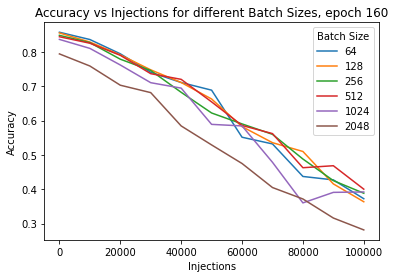

In [7]:
#Graphs for 100k injections, all epoch 160
bss=[64,128,256,512,1024,2048]
#bss=[2048]
sch="plateau"

tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
for bs in bss:
    print("Inj for bs: " + str(bs))
    name = "bs_"+str(bs)+"_sch_"+sch
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Batch Sizes, epoch 160")
plt.legend(bss,title="Batch Size")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

Inj for bs: 64
Inj for bs: 128
Inj for bs: 256
Inj for bs: 512
Inj for bs: 1024
Inj for bs: 2048


Text(0, 0.5, 'Accuracy')

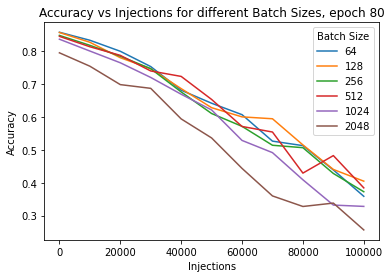

In [8]:
#Graphs for 100k injections, all epoch 80
bss=[64,128,256,512,1024,2048]
#bss=[64,128]
sch="plateau"

tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
for bs in bss:
    print("Inj for bs: " + str(bs))
    name = "bs_"+str(bs)+"_sch_"+sch
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_80"
    loaded=utils.load(save_name + ".json")
    best_accs.append(loaded["avg"][0])
    plt.plot(x,loaded["avg"])

plt.title("Accuracy vs Injections for different Batch Sizes, epoch 80")
plt.legend(bss,title="Batch Size")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

Inj for bs: 64
Inj for bs: 128
Inj for bs: 256
Inj for bs: 512
Inj for bs: 1024
Inj for bs: 2048


Text(0, 0.5, 'Accuracy Difference')

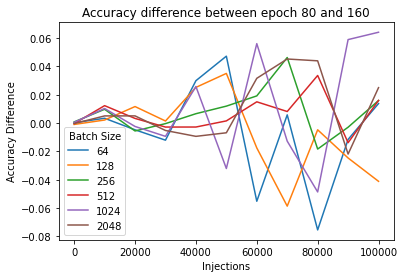

In [9]:
#Graph Dif
bss=[64,128,256,512,1024,2048]
#bss=[64,128]
sch="plateau"

tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
for bs in bss:
    print("Inj for bs: " + str(bs))
    name = "bs_"+str(bs)+"_sch_"+sch
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_80"
    loaded_80=utils.load(save_name + ".json")

    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded_160=utils.load(save_name + ".json")

    best_accs.append(loaded["avg"][0])
    plt.plot(x,(np.array(loaded_160["avg"]) - np.array(loaded_80["avg"])))

plt.title("Accuracy difference between epoch 80 and 160")
plt.legend(bss,title="Batch Size")
plt.xlabel("Injections")
plt.ylabel("Accuracy Difference")

In [ ]:
#Removing offset:

bss=[64,128,256,512,1024,2048]
#bss=[64,128]
sch="plateau"

tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step
for bs in bss:
    print("Inj for bs: " + str(bs))
    name = "bs_"+str(bs)+"_sch_"+sch
    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_80"
    loaded_80=utils.load(save_name + ".json")

    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded_160=utils.load(save_name + ".json")

    best_accs.append(loaded["avg"][0])
    plt.plot(x,(np.array(loaded_160["avg"]) - np.array(loaded_80["avg"])))

plt.title("Accuracy difference between epoch 80 and 160")
plt.legend(bss,title="Batch Size")
plt.xlabel("Injections")
plt.ylabel("Accuracy Difference")

In [11]:
np.zeros(11)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Inj for bs: 64
Inj for bs: 128
Inj for bs: 256
Inj for bs: 512
Inj for bs: 1024
Inj for bs: 2048


Text(0, 0.5, 'Accuracy')

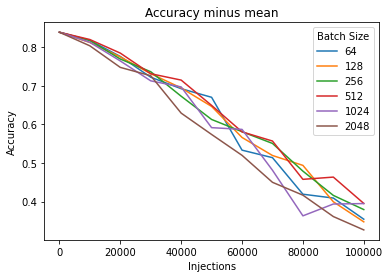

In [24]:
# Graphs minus offset (mean)

bss=[64,128,256,512,1024,2048]
#bss=[64,128]
sch="plateau"

tot=100000
step=10000
n_exp=5
best_accs=[]
x=np.array(range(0,11))*step

for bs in bss:
    name = "bs_"+str(bs)+"_sch_"+sch

    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded_160=utils.load(save_name + ".json")

    best_accs.append(loaded_160["avg"][0])

best_accs_avg=np.mean(best_accs)

for bs in bss:
    print("Inj for bs: " + str(bs))
    name = "bs_"+str(bs)+"_sch_"+sch

    save_name = name + "_inj_zero_tot_" + str(tot)+"_step_" + str(step) + "_nexp_"+ str(n_exp) + "_epoch_160"
    loaded_160=utils.load(save_name + ".json")

    offset = loaded_160["avg"][0] - best_accs_avg
    plt.plot(x,(np.array(loaded_160["avg"]) - offset))

plt.title("Accuracy minus mean")
plt.legend(bss,title="Batch Size")
plt.xlabel("Injections")
plt.ylabel("Accuracy")

In [22]:
best_accs_avg

0.8391833333333333

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])